In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cls = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=cls)
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
X = dataset.iloc[:, 0:4].values
Y = dataset.iloc[:, 4].values

In [5]:
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
Y = le.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [6]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, Y_train)
X_test = lda.transform(X_test)

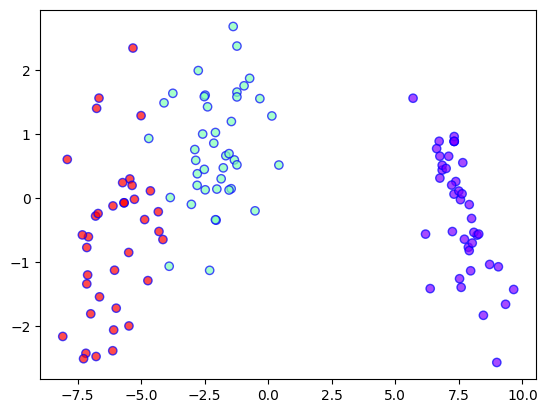

In [7]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap='rainbow', alpha=0.7,edgecolors='b')

In [8]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [9]:
print('Accuracy: ' + str(accuracy_score(Y_test, Y_pred)))
conf_m = confusion_matrix(Y_test, Y_pred)
print("confusion_matrix: ")
print(conf_m)

Accuracy: 0.7666666666666667
confusion_matrix: 
[[9 0 0]
 [0 8 0]
 [0 7 6]]
